### Agrupar Mineradoras de acordo com os dados de Exploração Mineral

#### Dataset: Compensação Financeira pela Exploração de Recursos Minerais (CFEM)
#### Fonte: https://dados.gov.br/dataset/sistema-arrecadacao

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
# Carregando os dados
dataset = pd.read_csv('dados/exploracaoRecursosMinerais.csv', sep=',', encoding='latin-1')

In [8]:
dataset.head(100)

,Periodo,Processo,Ano do Processo,CPF/CNPJ,Pessoa Física/Jurídica,Fase do Processo,Substância,Uf,Município,Unidade de Medida,Quantidade Comercializada,Valor Recolhido (CFEM)
0,2002,NaN,NaN,***.000.000-**,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,174
1,2002,910262.0,2007.0,88.503.388/0001-94,PEDRAS BASALTO TRES DE MAIO LTDA ...,NaN,BASALTO,RS,TRÊS DE MAIO,m3,0,"206,41"
2,2003,NaN,NaN,NaN,NaN,NaN,FERRO,SC,ARAQUARI,NaN,NaN,"11946,44"
3,2003,NaN,NaN,NaN,NaN,NaN,FERRO,SP,SÃO JOÃO DA BOA VISTA,NaN,NaN,"84,06"
4,2003,NaN,NaN,***.000.000-**,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,"54694836,3"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2003,NaN,NaN,***.898.471-**,JOÃO TEIXEIRA SOBRINHO ...,NaN,AREIA,GO,GOIANÉSIA,m3,416,"80,97"
96,2003,NaN,NaN,***.907.421-**,ESTELITA CARNEIRO DA SILVA CASTRO,NaN,AREIA,GO,ITAPURANGA,m3,3521,"565,37"
97,2003,NaN,NaN,***.908.916-**,Enilson Sergio da Silva,NaN,AREIA LAVADA,MG,CANA VERDE,m3,618,"20,21"
98,2003,NaN,NaN,***.910.933-**,AROLDO JUCA DE QUEIROZ ...,NaN,GRANITO ORNAMENTAL,CE,SANTA QUITÉRIA,m3,74,"104,33"


In [9]:
dataset.shape

(202405, 12)

In [10]:
dataset.isnull().sum()

Periodo                          0
Processo                     17157
Ano do Processo              17157
CPF/CNPJ                        45
Pessoa Física/Jurídica          31
Fase do Processo             31316
Substância                      32
Uf                            1268
Município                     1268
Unidade de Medida              184
Quantidade Comercializada     1574
Valor Recolhido (CFEM)           0
dtype: int64

In [11]:
#Retirando espaços em branco do início e fim das variáveis
dataset = dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
#Utilizando apenas as linhas que tem os dados que vou precisar para a análise
dataset.dropna(subset=["Fase do Processo"], inplace=True)
dataset.dropna(subset=["Substância"], inplace=True)
dataset.dropna(subset=["Uf"], inplace=True)
dataset.dropna(subset=["Município"], inplace=True)

In [13]:
#Passo a coluna Fase do Processo para um inteiro, índice,  da sua categoria
valores_unicos = dataset['Fase do Processo'].unique()
total_valores = len(valores_unicos)
mapeamento = dict(zip(valores_unicos, range(total_valores)))
dataset['Fase do Processo_cat'] = dataset['Fase do Processo'].replace(mapeamento)
dataset["Fase do Processo_cat"] = pd.Categorical(dataset["Fase do Processo_cat"])
dataset.dropna(subset=["Fase do Processo_cat"], inplace=True)

In [14]:
#Passo a coluna Substância para um inteiro, índice,  da sua categoria
valores_unicos = dataset['Substância'].unique()
total_valores = len(valores_unicos)
mapeamento = dict(zip(valores_unicos, range(total_valores)))
dataset['Substância_cat'] = dataset['Substância'].replace(mapeamento)
dataset["Substância_cat"] = pd.Categorical(dataset["Substância_cat"])
dataset.dropna(subset=["Substância_cat"], inplace=True)

In [15]:
#Passo a coluna Uf para um inteiro, índice,  da sua categoria
valores_unicos = dataset['Uf'].unique()
total_valores = len(valores_unicos)
mapeamento = dict(zip(valores_unicos, range(total_valores)))
dataset['Uf_cat'] = dataset['Uf'].replace(mapeamento)
dataset["Uf_cat"] = pd.Categorical(dataset["Uf_cat"])
dataset.dropna(subset=["Uf_cat"], inplace=True)

In [16]:
#Passo a coluna Municipio para um inteiro, índice,  da sua categoria
valores_unicos = dataset['Município'].unique()
total_valores = len(valores_unicos)
mapeamento = dict(zip(valores_unicos, range(total_valores)))
dataset['Município_cat'] = dataset['Município'].replace(mapeamento)
dataset["Município_cat"] = pd.Categorical(dataset["Município_cat"])
dataset.dropna(subset=["Município_cat"], inplace=True)

In [17]:
#Utilizando apenas as linhas que tem os dados que vou precisar para a análise

dataset["CPF/CNPJ"].fillna('***.000.000-**', inplace=True)
dataset.dropna(subset=["Pessoa Física/Jurídica"], inplace=True)

In [18]:
dataset['Valor Recolhido (CFEM)'] = dataset["Valor Recolhido (CFEM)"].str.replace(',','.')
dataset['Valor Recolhido (CFEM)'] = dataset['Valor Recolhido (CFEM)'].apply(pd.to_numeric)
dataset["Valor Recolhido (CFEM)"] = pd.to_numeric(dataset["Valor Recolhido (CFEM)"])

In [19]:
dataset.dropna(subset=["Valor Recolhido (CFEM)"], inplace=True)

In [20]:
dataset.head()

,Periodo,Processo,Ano do Processo,CPF/CNPJ,Pessoa Física/Jurídica,Fase do Processo,Substância,Uf,Município,Unidade de Medida,Quantidade Comercializada,Valor Recolhido (CFEM),Fase do Processo_cat,Substância_cat,Uf_cat,Município_cat
3470,2003,81.0,1948.0,29.627.007/0001-10,Estância Hidromineral Soledade LTDA ME,Concessão de Lavra,ÁGUA MINERAL,RJ,ITAPERUNA,l,1134240,728.25,0,0,0,0
3471,2003,135.0,1951.0,19.791.581/0001-55,COMPANHIA DE DESENVOLVIMENTO ECONOMICO DE MINAS G,Concessão de Lavra,ÁGUA MINERAL,MG,CAMBUQUIRA,l,686929,203.76,0,0,1,1
3472,2003,370.0,1956.0,60.580.396/0001-15,Companhia Geral de Minas,Concessão de Lavra,BAUXITA,MG,POÇOS DE CALDAS,t,852,61.66,0,1,1,2
3473,2003,397.0,1942.0,23.064.231/0001-64,Bemil Beneficiamento de Minérios Ltda,Concessão de Lavra,CALCÁRIO,MG,OURO PRETO,t,10899,2425.82,0,2,1,3
3474,2003,397.0,1942.0,23.064.231/0001-64,Bemil Beneficiamento de Minérios Ltda,Concessão de Lavra,DOLOMITO,MG,OURO PRETO,t,44370,12351.68,0,3,1,3


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169858 entries, 3470 to 202339
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Periodo                    169858 non-null  int64   
 1   Processo                   169858 non-null  float64 
 2   Ano do Processo            169858 non-null  float64 
 3   CPF/CNPJ                   169858 non-null  object  
 4   Pessoa Física/Jurídica     169858 non-null  object  
 5   Fase do Processo           169858 non-null  object  
 6   Substância                 169858 non-null  object  
 7   Uf                         169858 non-null  object  
 8   Município                  169858 non-null  object  
 9   Unidade de Medida          169745 non-null  object  
 10  Quantidade Comercializada  168919 non-null  object  
 11  Valor Recolhido (CFEM)     169858 non-null  float64 
 12  Fase do Processo_cat       169858 non-null  category
 13  Substância_

In [22]:
#Passo a Quantidade Comercializada para uma coluna numérica
dataset['Quantidade Comercializada'] = pd.to_numeric(dataset['Quantidade Comercializada'], errors='coerce')

In [23]:
#Substituindo os valores em branco de variáveis por nulo para poder excluir a coluna.
dataset['Fase do Processo'].replace('', np.nan, inplace=True)
dataset.dropna(subset=["Fase do Processo"], inplace=True)

In [24]:
#Colocando na coluna Quantidade Comercializada a média agrupada pela substância
med = dataset.groupby('Substância')['Quantidade Comercializada'].transform('mean')

In [25]:
dataset['Quantidade Comercializada'].fillna(med, inplace=True)
dataset.dropna(subset=["Quantidade Comercializada"], inplace=True)

In [26]:
dataset = dataset.sample(frac=0.5)

In [27]:
nomesColunas = ["Fase do Processo_cat", "Substância_cat", "Uf_cat", "Município_cat", "Quantidade Comercializada", "Valor Recolhido (CFEM)"]
dataset_2 = dataset[nomesColunas]

In [28]:
dataset_2.head()

,Fase do Processo_cat,Substância_cat,Uf_cat,Município_cat,Quantidade Comercializada,Valor Recolhido (CFEM)
114858,2,20,6,311,4.284600e+04,2477.03
179815,0,42,1,433,4.470000e+02,64.85
143496,2,20,8,2309,8.094000e+03,752.74
109223,0,0,0,0,1.514777e+06,6220.35
79976,2,42,8,1015,2.429630e+05,58.30


In [29]:
# Obter os valores dos atributos
dataset_atrib = dataset_2.values
dataset_atrib.shape

(84816, 6)

In [30]:
# Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(dataset_atrib)

In [31]:
# Determinando um range de K
k_range = range(1,12)

In [32]:
# Aplicando o modelo K-Means para cada valor de K 
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [33]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [34]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [35]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [36]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [37]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

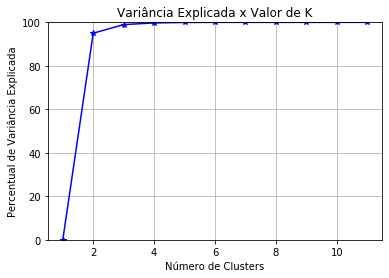

In [38]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [39]:
# Criando um modelo com K = 3
modelo = KMeans(n_clusters = 3)
modelo.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
# Silhouette Score
labels = modelo.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.999783877499161

In [43]:
# Cria o cluster map
colunas = ["Periodo", "Processo", "Ano do Processo", "CPF/CNPJ", "Pessoa Física/Jurídica", "Fase do Processo", "Substância", "Uf", "Município", "Unidade de Medida","Quantidade Comercializada", "Valor Recolhido (CFEM)"]
cluster_map = pd.DataFrame(dataset, columns = colunas)
cluster_map['cluster'] = modelo.labels_

In [44]:
cluster_map

,Periodo,Processo,Ano do Processo,CPF/CNPJ,Pessoa Física/Jurídica,Fase do Processo,Substância,Uf,Município,Unidade de Medida,Quantidade Comercializada,Valor Recolhido (CFEM),cluster
114858,2015,811210.0,2011.0,90.063.470/0001-97,Conpasul Construção e Serviços Ltda,Licenciamento,CASCALHO,RS,VERA CRUZ,m3,4.284600e+04,2477.03,0
179815,2019,834633.0,1995.0,19.061.472/0001-82,Porto de Areia São Geraldo Ltda.,Concessão de Lavra,AREIA,MG,UBERABA,t,4.470000e+02,64.85,0
143496,2017,816020.0,2013.0,92.791.243/0001-03,IRANI PAPEL E EMBALAGEM S.A.,Licenciamento,CASCALHO,SC,PONTE SERRADA,t,8.094000e+03,752.74,0
109223,2014,890116.0,1997.0,29.627.007/0001-10,Estância Hidromineral Soledade LTDA ME,Concessão de Lavra,ÁGUA MINERAL,RJ,ITAPERUNA,l,1.514777e+06,6220.35,0
79976,2012,815322.0,2000.0,79.305.884/0001-42,Extração de Areia Verde Vale Ltda Epp,Licenciamento,AREIA,SC,RIO DOS CEDROS,m3,2.429630e+05,58.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137125,2016,890337.0,1981.0,32.487.266/0001-05,Pedreira Volta Redonda Ltda,Licenciamento,GNAISSE,RJ,VOLTA REDONDA,m3,1.481293e+06,125948.46,0
47097,2008,866987.0,1991.0,15.443.617/0001-59,CERÂMICA FIGUEIRA LTDA,Licenciamento,ARGILA,MS,RIO VERDE DE MATO GROSSO,t,7.217756e+05,2616.15,0
145095,2017,826085.0,2004.0,03.881.708/0001-97,Rodrigo Luis Hobi e Cia. Ltda.,Concessão de Lavra,DIABÁSIO,PR,SÃO MATEUS DO SUL,t,2.224656e+04,112566.81,0
191449,2020,820213.0,2004.0,00.250.680/0001-00,Fonte Jardim Comercio de Agua Ltda Me,Concessão de Lavra,ÁGUA MINERAL,SP,CACONDE,l,5.264489e+07,750.89,0


In [45]:
cluster_map['cluster'].unique()

array([0, 2, 1], dtype=int32)